In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [2]:
print(tf.__version__)

2.14.0


# Explore data


In [3]:
import os
data_path = "./data/intel_data/"

# Walk through pizza_steak directory and list number of files

print("Train data: ")

for dirpath, dirnames, filenames in os.walk(data_path+"seg_train/seg_train"):
    print(

        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

print("Test data: ")

for dirpath, dirnames, filenames in os.walk(data_path+"seg_test/seg_test"):
    print(

        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

print("Prediction data: ")

for dirpath, dirnames, filenames in os.walk(data_path+"seg_pred/seg_pred"):
    print(

        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Train data: 
There are 6 directories and 0 images in './data/intel_data/seg_train/seg_train'.
There are 0 directories and 2191 images in './data/intel_data/seg_train/seg_train\buildings'.
There are 0 directories and 2271 images in './data/intel_data/seg_train/seg_train\forest'.
There are 0 directories and 2404 images in './data/intel_data/seg_train/seg_train\glacier'.
There are 0 directories and 2512 images in './data/intel_data/seg_train/seg_train\mountain'.
There are 0 directories and 2274 images in './data/intel_data/seg_train/seg_train\sea'.
There are 0 directories and 2382 images in './data/intel_data/seg_train/seg_train\street'.
Test data: 
There are 6 directories and 0 images in './data/intel_data/seg_test/seg_test'.
There are 0 directories and 437 images in './data/intel_data/seg_test/seg_test\buildings'.
There are 0 directories and 474 images in './data/intel_data/seg_test/seg_test\forest'.
There are 0 directories and 553 images in './data/intel_data/seg_test/seg_test\glacier'

In [4]:
import random
import matplotlib.pyplot as plt


def view_random_image(target_dir, target_class):
    # We will view image from here
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img

Image shape (150, 150, 3)


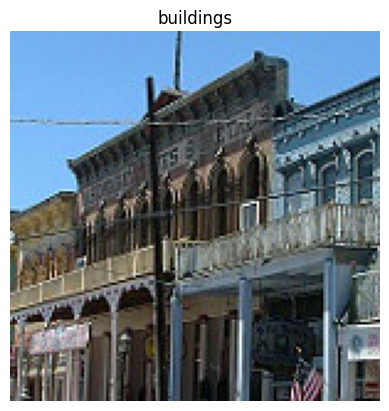

In [5]:
img = view_random_image(target_dir=data_path+'seg_train/seg_train/',
                        target_class='buildings')

In [6]:
# Get the class name programmatically
import pathlib
data_dir = pathlib.Path(data_path+"seg_train/seg_train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)


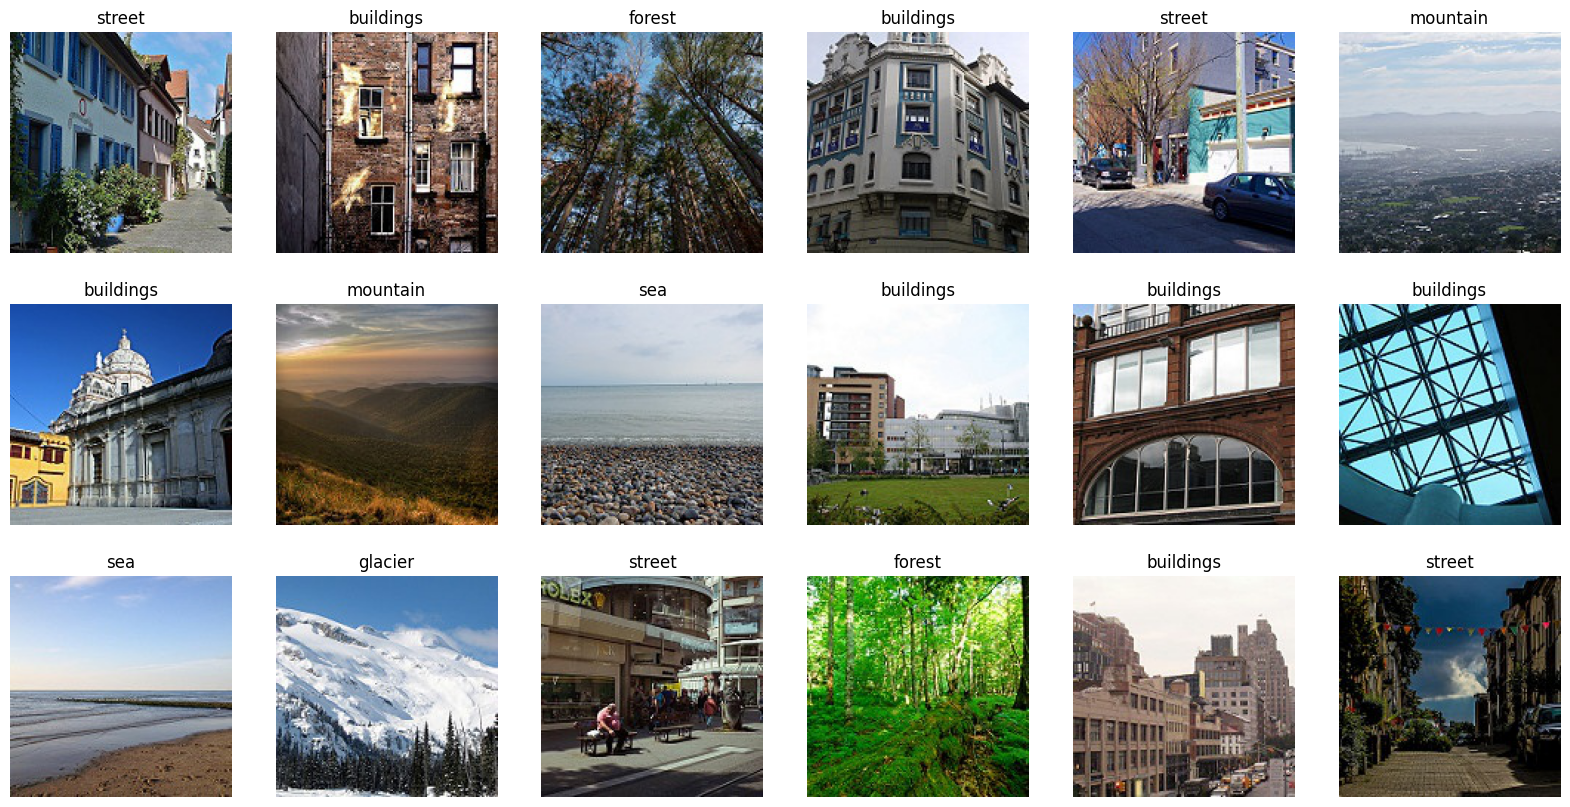

In [7]:
plt.figure(figsize=(20, 10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir=data_path+'seg_train/seg_train/',
                            target_class=class_name)

# Prepare data for model


In [8]:
train_dir = data_path+"seg_train/seg_train/"
test_dir = data_path+"seg_test/seg_test/"

In [10]:
# Create augmented data generator instance
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255.)

# Load data(data, label) from directory and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150, 150),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = val_datagen.flow_from_directory(test_dir,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Basic model Buildinig (CNN Classifier)


In [11]:
model_1 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPool2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [12]:
history_1 = model_1.fit(train_data,
                        epochs=4,
                        batch_size=32,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/4
439/439 [==============================] - 90s 203ms/step - loss: 1.0509 - accuracy: 0.5842 - val_loss: 0.7635 - val_accuracy: 0.7033
Epoch 2/4
439/439 [==============================] - 82s 188ms/step - loss: 0.8082 - accuracy: 0.6967 - val_loss: 0.6809 - val_accuracy: 0.7503
Epoch 3/4
439/439 [==============================] - 81s 183ms/step - loss: 0.7134 - accuracy: 0.7357 - val_loss: 0.6082 - val_accuracy: 0.7750
Epoch 4/4
439/439 [==============================] - 82s 186ms/step - loss: 0.6483 - accuracy: 0.7619 - val_loss: 0.5363 - val_accuracy: 0.7980


In [13]:
model_1.evaluate(test_data)

94/94 [==============================] - 3s 34ms/step - loss: 0.5363 - accuracy: 0.7980


[0.5363326668739319, 0.7979999780654907]

Text(0, 0.5, 'Loss')

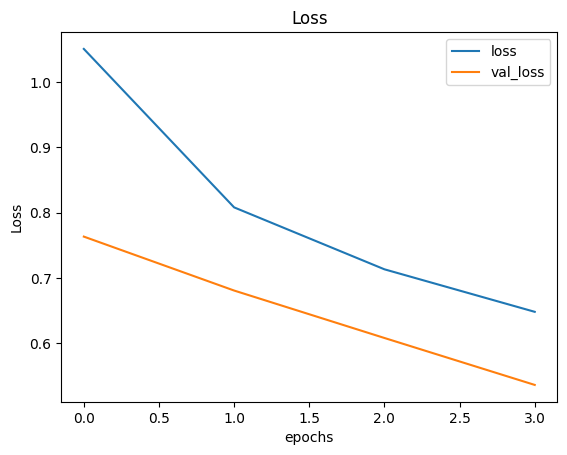

In [14]:
pd.DataFrame(history_1.history)[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

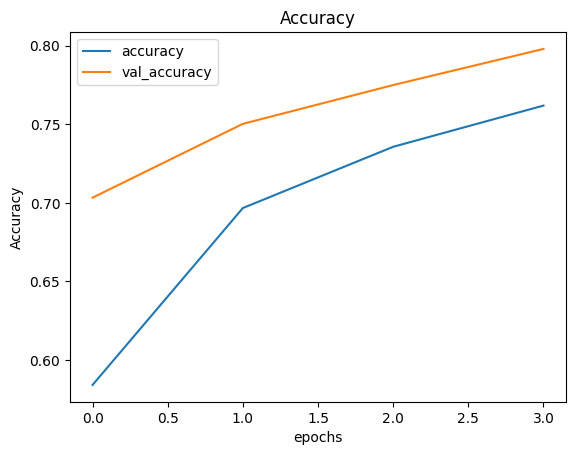

In [15]:
pd.DataFrame(history_1.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [16]:
model_1.save('./models/', save_format='tf')

INFO:tensorflow:Assets written to: ./models/assets


INFO:tensorflow:Assets written to: ./models/assets


In [19]:
ls -alrt models

 Volume in drive C has no label.
 Volume Serial Number is 4A43-099A

 Directory of c:\Users\zades\Documents\python_projects\study\MLOps\mykubeRepo


 Directory of c:\Users\zades\Documents\python_projects\study\MLOps\mykubeRepo\models

11-11-2023  01:13 PM    <DIR>          .
10-11-2023  09:17 PM    <DIR>          ..
08-11-2023  10:42 PM    <DIR>          assets
11-11-2023  01:13 PM                56 fingerprint.pb
11-11-2023  01:13 PM            20,231 keras_metadata.pb
11-11-2023  01:13 PM           159,471 saved_model.pb
11-11-2023  01:13 PM    <DIR>          variables
               3 File(s)        179,758 bytes
               4 Dir(s)  505,189,322,752 bytes free


File Not Found


In [20]:
model_loaded = tf.keras.models.load_model('./models/')

In [21]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [23]:
from PIL import Image
import numpy as np
from skimage import transform


def process(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')
    np_image = transform.resize(np_image, (150, 150, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

In [24]:
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
pred_label = model_loaded.predict(
    process('./data/intel_data/seg_test/seg_test/forest/20089.jpg'))

print(classes[np.argmax(pred_label)])

1/1 [==============================] - 0s 85ms/step
forest


In [25]:
pred_label

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
!zip -r models.zip models/